Edges: [(0, 1), (0, 3), (1, 2), (2, 3)]


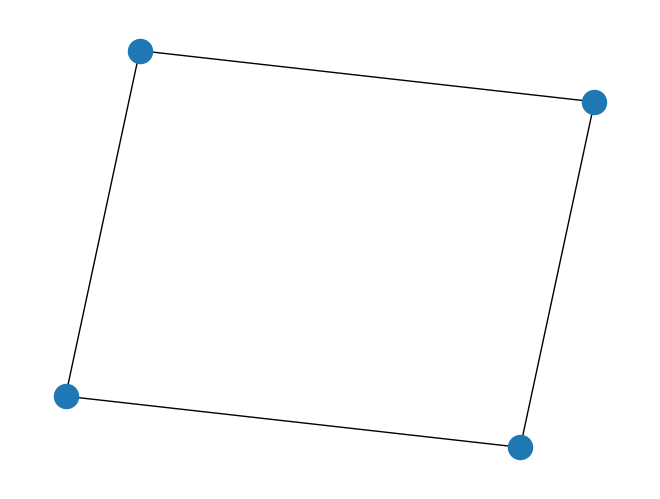

In [1]:
import pennylane as qml
from matplotlib import pyplot as plt
from pennylane import numpy as np
import scipy
import networkx as nx
import copy


qubit_number = 4
qubits = range(qubit_number)


ising_graph = nx.cycle_graph(qubit_number)
print(f"Edges: {ising_graph.edges}")
nx.draw(ising_graph)


Edges: [(0, 1), (0, 6), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]


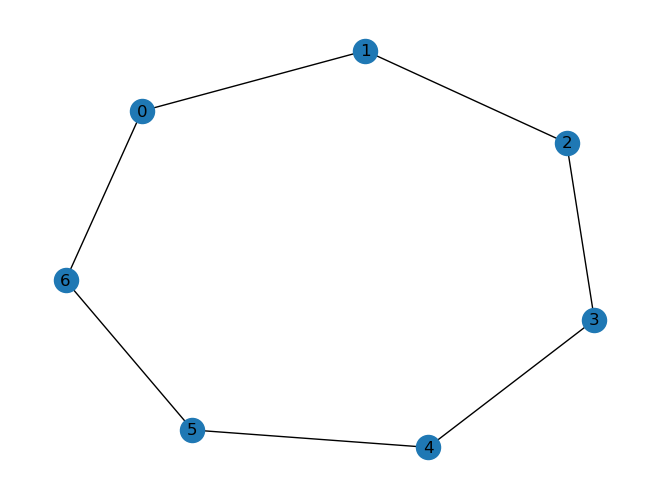

In [2]:
import pennylane as qml
from matplotlib import pyplot as plt
from pennylane import numpy as np
import scipy
import networkx as nx
import copy


qubit_number = 7  
qubits = range(qubit_number)

ising_graph = nx.Graph()
ising_graph.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 0)])
print(f"Edges: {ising_graph.edges}")
nx.draw(ising_graph, with_labels=True)
plt.show()


Edges: [(0, 1), (0, 2), (0, 3), (1, 4), (2, 5), (4, 5)]


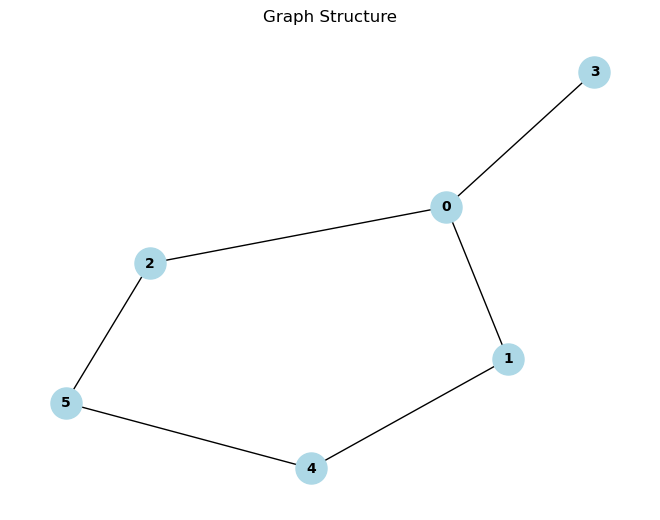

In [6]:
import pennylane as qml
from matplotlib import pyplot as plt
from pennylane import numpy as np
import scipy
import networkx as nx
import copy


qubit_number = 6
qubits = range(qubit_number)

ising_graph = nx.Graph()
ising_graph.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (2, 5), (4, 5)])  
print(f"Edges: {ising_graph.edges}")
pos = nx.spring_layout(ising_graph)
nx.draw(ising_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Graph Structure")
plt.show()


In [7]:

target_weights = [0.56, 1.24, 1.67, -0.79, 1.11, -1.03, 0.85, -0.45, 0.72]
target_bias = [-1.44, -1.43, 1.18, -0.93, 0.67, -0.55]


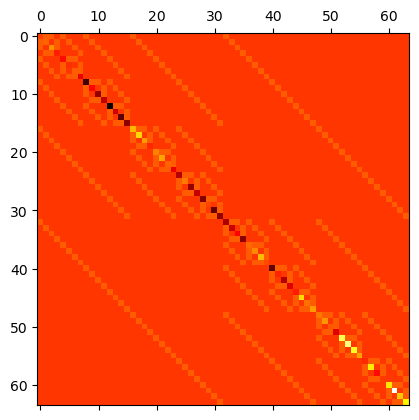

In [8]:
def create_hamiltonian_matrix(n_qubits, graph, weights, bias):
    full_matrix = np.zeros((2 ** n_qubits, 2 ** n_qubits))
    for i, edge in enumerate(graph.edges):
        interaction_term = 1
        for qubit in range(n_qubits):
            if qubit in edge:
                interaction_term = np.kron(interaction_term, qml.matrix(qml.PauliZ(0)))
            else:
                interaction_term = np.kron(interaction_term, np.identity(2))
        full_matrix += weights[i] * interaction_term
    for i in range(n_qubits):
        z_term = x_term = 1
        for j in range(n_qubits):
            if j == i:
                z_term = np.kron(z_term, qml.matrix(qml.PauliZ(0)))
                x_term = np.kron(x_term, qml.matrix(qml.PauliX(0)))
            else:
                z_term = np.kron(z_term, np.identity(2))
                x_term = np.kron(x_term, np.identity(2))
        full_matrix += bias[i] * z_term + x_term
    return full_matrix


ham_matrix = create_hamiltonian_matrix(qubit_number, ising_graph, target_weights, target_bias)
plt.matshow(ham_matrix, cmap="hot")
plt.show()


In [14]:

low_energy_state = np.random.rand(2**qubit_number) + 1j * np.random.rand(2**qubit_number)
low_energy_state /= np.linalg.norm(low_energy_state)

#Verification
res = np.vdot(low_energy_state, (ham_matrix @ low_energy_state))
energy_exp = np.real_if_close(res)
print(f"Energy Expectation: {energy_exp}")

ground_state_energy = np.real_if_close(min(np.linalg.eig(ham_matrix)[0]))
print(f"Ground State Energy: {ground_state_energy}")


Energy Expectation: 4.571929742349167
Ground State Energy: -10.07492166396924


In [15]:
def state_evolve(hamiltonian, qubits, time):
    U = scipy.linalg.expm(-1j * hamiltonian * time)
    qml.QubitUnitary(U, wires=qubits)


In [16]:
def qgrnn_layer(weights, bias, qubits, graph, trotter_step):
    for i, edge in enumerate(graph.edges):
        qml.MultiRZ(2 * weights[i] * trotter_step, wires=(edge[0], edge[1]))
    for i, qubit in enumerate(qubits):
        qml.RZ(2 * bias[i] * trotter_step, wires=qubit)
    for qubit in qubits:
        qml.RX(2 * trotter_step, wires=qubit)


In [17]:
def swap_test(control, register1, register2):
    qml.Hadamard(wires=control)
    for reg1_qubit, reg2_qubit in zip(register1, register2):
        qml.CSWAP(wires=(control, reg1_qubit, reg2_qubit))
    qml.Hadamard(wires=control)


In [2]:
import numpy as np

In [3]:
low_energy_state = np.array([
    (-0.054661080280306085 + 0.016713907320174026j),
    (0.12290003656489545 - 0.03758500591109822j),
    (0.3649337966440005 - 0.11158863596657455j),
    (-0.8205175732627094 + 0.25093231967092877j),
    (0.010369790825776609 - 0.0031706387262686003j),
    (-0.02331544978544721 + 0.007129899300113728j),
    (-0.06923183949694546 + 0.0211684344103713j),
    (0.15566094863283836 - 0.04760201916285508j),
    (0.014520590919500158 - 0.004441887836078486j),
    (-0.032648113364535575 + 0.009988590222879195j),
    (-0.09694382811137187 + 0.02965579457620536j),
    (0.21796861485652747 - 0.06668776658411019j),
    (-0.0027547112135013247 + 0.0008426289322652901j),
    (0.006193695872468649 - 0.0018948418969390599j),
    (0.018391279795405405 - 0.005625722994009138j),
    (-0.041350974715649635 + 0.012650711602265649j),
    (0.12396187413712077 - 0.03909596447156414j),
    (-0.2785408359579403 + 0.0878614648468395j),
    (-0.8265743586854676 + 0.2602782456524087j),
    (1.0185395820102958 - 0.3207388696887115j),
    (-0.19437108747392607 + 0.06302142455311899j),
    (0.36947030484714864 - 0.12528733897565933j),
    (1.125731033308262 - 0.3478587556890385j),
    (-1.209775003216594 + 0.38451421578106336j),
    (0.16881983901669982 - 0.06078144626849783j),
    (-0.3325263728341222 + 0.12212670606479032j),
    (-1.0821673198896955 + 0.3866190901516358j),
    (1.1623783884765372 - 0.41113061537736256j),
    (-0.143936108358518 + 0.057289264832538964j),
    (0.28645819678490625 - 0.11671581243602414j),
    (0.9497568678591133 - 0.40028846467152845j),
    (-1.0195730166377642 + 0.4236865330864933j),
    (0.12031693419686215 - 0.05167632525551407j),
    (-0.23958541634283398 + 0.10851518559151883j),
    (-0.8162983347502171 + 0.4078251821242592j),
    (0.8740216576587783 - 0.4280565744568943j)
])

Edges: [(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (4, 5)]


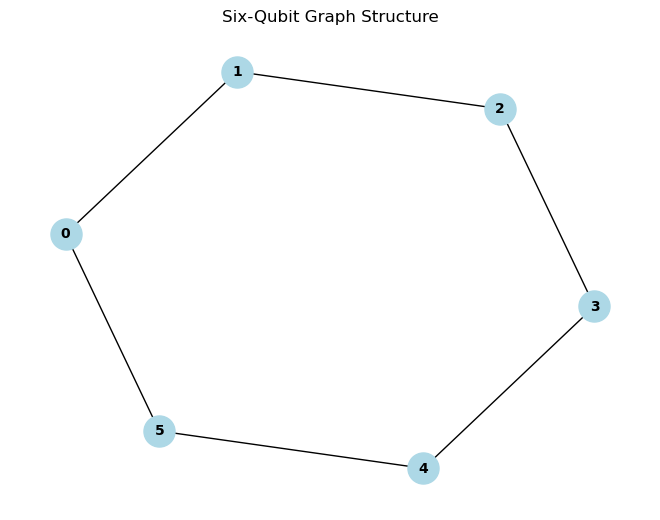

Target Weights: [ 0.5479121  -0.12224312  0.71719584  0.39473606 -0.8116453   0.9512447 ]
Target Bias: [ 0.5222794   0.57212861 -0.74377273 -0.09922812 -0.25840395  0.85352998]


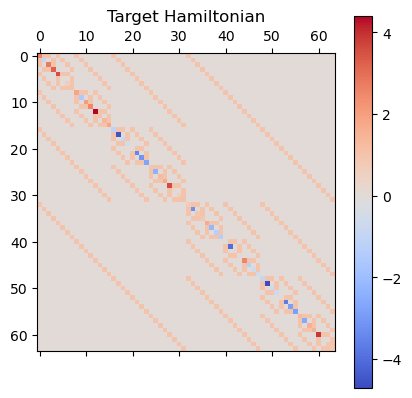

In [5]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import copy
import scipy


qubit_number = 6
qubits = range(qubit_number)


sensor_graph = nx.Graph()
sensor_graph.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)])  # Six-qubit ring graph
print(f"Edges: {sensor_graph.edges}")
pos = nx.spring_layout(sensor_graph)
nx.draw(sensor_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Six-Qubit Graph Structure")
plt.show()

# Random generation of the "unknown" target parameters for six qubits
rng = np.random.default_rng(seed=42)
target_weights = rng.random(size=len(sensor_graph.edges)) * 2 - 1  # 6 edges
target_bias = rng.random(size=qubit_number) * 2 - 1               # 6 nodes
print(f"Target Weights: {target_weights}")
print(f"Target Bias: {target_bias}")

# Hamiltonian matrix
def create_hamiltonian_matrix(n_qubits, graph, weights, bias):
    full_matrix = np.zeros((2 ** n_qubits, 2 ** n_qubits))
    for i, edge in enumerate(graph.edges):
        interaction_term = 1
        for qubit in range(n_qubits):
            if qubit in edge:
                interaction_term = np.kron(interaction_term, qml.matrix(qml.PauliZ(0)))
            else:
                interaction_term = np.kron(interaction_term, np.identity(2))
        full_matrix += weights[i] * interaction_term
    for i in range(n_qubits):
        z_term = x_term = 1
        for j in range(n_qubits):
            if j == i:
                z_term = np.kron(z_term, qml.matrix(qml.PauliZ(0)))
                x_term = np.kron(x_term, qml.matrix(qml.PauliX(0)))
            else:
                z_term = np.kron(z_term, np.identity(2))
                x_term = np.kron(x_term, np.identity(2))
        full_matrix += bias[i] * z_term + x_term
    return full_matrix

# Visual representation of the Hamiltonian matrix
ham_matrix = create_hamiltonian_matrix(qubit_number, sensor_graph, target_weights, target_bias)
plt.matshow(ham_matrix, cmap="coolwarm")
plt.title("Target Hamiltonian")
plt.colorbar()
plt.show()


In [6]:
# Define the provided low-energy state for 6 qubits
low_energy_state = rng.random(size=(2 ** qubit_number)) + 1j * rng.random(size=(2 ** qubit_number))
low_energy_state /= np.linalg.norm(low_energy_state)  # Normalize the state


print("Hamiltonian matrix shape:", ham_matrix.shape)
print("Low-energy state shape:", low_energy_state.shape)

# Compute the energy expectation value
res = np.vdot(low_energy_state, ham_matrix @ low_energy_state)
energy_exp = np.real_if_close(res)
print(f"Energy Expectation: {energy_exp}")


def state_evolve(hamiltonian, qubits, time):
    U = scipy.linalg.expm(-1j * hamiltonian * time)
    qml.QubitUnitary(U, wires=qubits)

# QGRNN layer
def qgrnn_layer(weights, bias, qubits, graph, trotter_step):
    for i, edge in enumerate(graph.edges):
        qml.MultiRZ(2 * weights[i] * trotter_step, wires=(edge[0], edge[1]))
    for i, qubit in enumerate(qubits):
        qml.RZ(2 * bias[i] * trotter_step, wires=qubit)
    for qubit in qubits:
        qml.RX(2 * trotter_step, wires=qubit)

# SWAP test
def swap_test(control, register1, register2):
    qml.Hadamard(wires=control)
    for reg1_qubit, reg2_qubit in zip(register1, register2):
        qml.CSWAP(wires=(control, reg1_qubit, reg2_qubit))
    qml.Hadamard(wires=control)

# QGRNN circuit
reg1 = tuple(range(qubit_number))
reg2 = tuple(range(qubit_number, 2 * qubit_number))
control = 2 * qubit_number
trotter_step = 0.01

Hamiltonian matrix shape: (64, 64)
Low-energy state shape: (64,)
Energy Expectation: 4.693879802218487


Edges: [(6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (7, 8), (7, 9), (7, 10), (7, 11), (8, 9), (8, 10), (8, 11), (9, 10), (9, 11), (10, 11)]


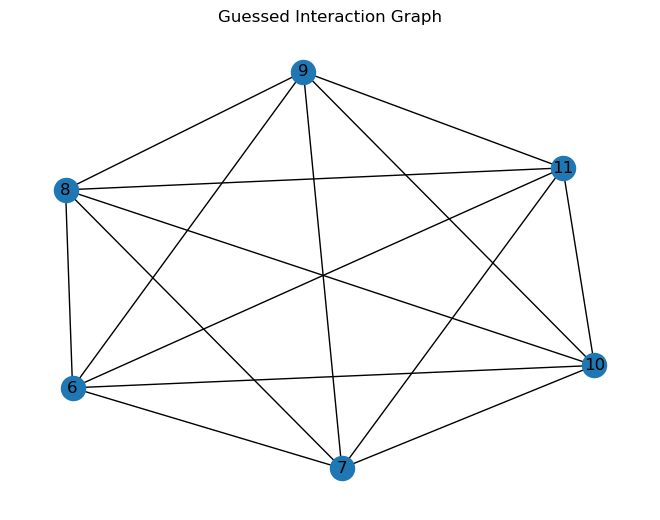

In [7]:
# interaction graph for the new qubit system
new_ising_graph = nx.complete_graph(reg2)
print(f"Edges: {new_ising_graph.edges}")
nx.draw(new_ising_graph, with_labels=True)
plt.title("Guessed Interaction Graph")
plt.show()

In [8]:
def qgrnn(weights, bias, time=None):
    qml.StatePrep(np.kron(low_energy_state, low_energy_state), wires=reg1 + reg2)
    state_evolve(ham_matrix, reg1, time)
    depth = time / trotter_step
    for _ in range(int(depth)):
        qgrnn_layer(weights, bias, reg2, new_ising_graph, trotter_step)
    swap_test(control, reg1, reg2)
    return qml.expval(qml.PauliZ(control))


In [9]:
# Cost function
N = 15
max_time = 0.1

def cost_function(weight_params, bias_params):
    times_sampled = rng.random(size=N) * max_time
    total_cost = 0
    for dt in times_sampled:
        result = qgrnn_qnode(weight_params, bias_params, time=dt)
        infidelity = 1 - np.abs(result) ** 2
        if infidelity <= 0:
            print(f"Non-positive infidelity: {infidelity}, result: {result}, time: {dt}")
        total_cost += infidelity
    return total_cost / N

# new device
qgrnn_dev = qml.device("default.qubit", wires=2 * qubit_number + 1)

# new QNode
qgrnn_qnode = qml.QNode(qgrnn, qgrnn_dev)

steps = 500
optimizer = qml.AdamOptimizer(stepsize=0.5)
weights = rng.random(size=len(new_ising_graph.edges), requires_grad=True) - 0.5
bias = rng.random(size=qubit_number, requires_grad=True) - 0.5

initial_weights = copy.copy(weights)
initial_bias = copy.copy(bias)


Cost at Step 0: 0.051356018880657314
Weights at Step 0: [ 0.48665272  0.49066949 -0.06215727 -0.42819602 -0.52648876  0.26697081
  0.33154929 -0.47931323 -0.56091629  0.02160519 -0.17369762 -0.1038286
 -0.85974459 -0.44592696  0.10857243]
Bias at Step 0: [ 0.67222905  0.28122585 -0.34057272 -0.27299866 -0.23132144  0.10773825]
---------------------------------------------
Cost at Step 50: 0.0008615660617824039
Weights at Step 50: [ 0.51661523 -0.01353373  0.0079109   0.04828666 -0.14242399  0.74330529
 -0.02363515 -0.02112851  0.01009102  0.47530142  0.05104204 -0.00722645
 -0.85932194  0.00299301  1.07604005]
Bias at Step 50: [ 0.57049673  0.69594024 -0.768678   -0.16219963 -0.289284    0.93324619]
---------------------------------------------
Cost at Step 100: 0.0004151461302707012
Weights at Step 100: [ 5.76131663e-01 -1.81793689e-03 -1.29131075e-03  2.52918323e-02
 -1.15885341e-01  7.59236715e-01 -1.55656188e-02  1.06049892e-04
  2.17059306e-03  4.32675649e-01  1.28242866e-02  1.29

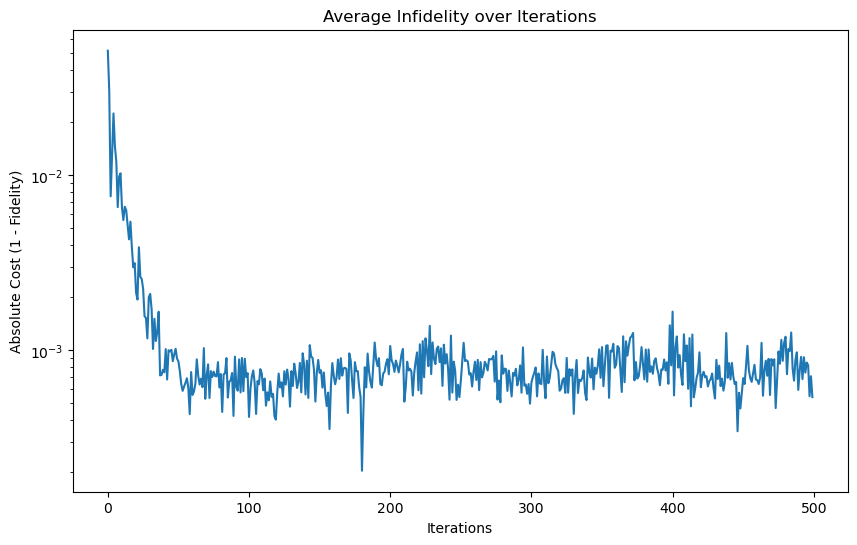

In [10]:
cost_history = []

for i in range(steps):
    (weights, bias), cost = optimizer.step_and_cost(cost_function, weights, bias)
    cost_history.append(cost)
    if i % 50 == 0:  
        print(f"Cost at Step {i}: {cost}")
        print(f"Weights at Step {i}: {weights}")
        print(f"Bias at Step {i}: {bias}")
        print("---------------------------------------------")

# Debugging 
print("Final weights: ", weights)
print("Final bias: ", bias)
if not cost_history:
    print("No cost values found. Check the optimizer and cost function for issues.")
else:
    print("Cost values found. Proceeding to plot.")

plt.figure(figsize=(10, 6))
plt.plot(range(steps), np.abs(cost_history))
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Absolute Cost (1 - Fidelity)')
plt.title('Average Infidelity over Iterations')
plt.show()

In [11]:
new_ham_matrix = create_hamiltonian_matrix(
    qubit_number, sensor_graph, weights, bias
)

init_ham = create_hamiltonian_matrix(
    qubit_number, sensor_graph, initial_weights, initial_bias
)


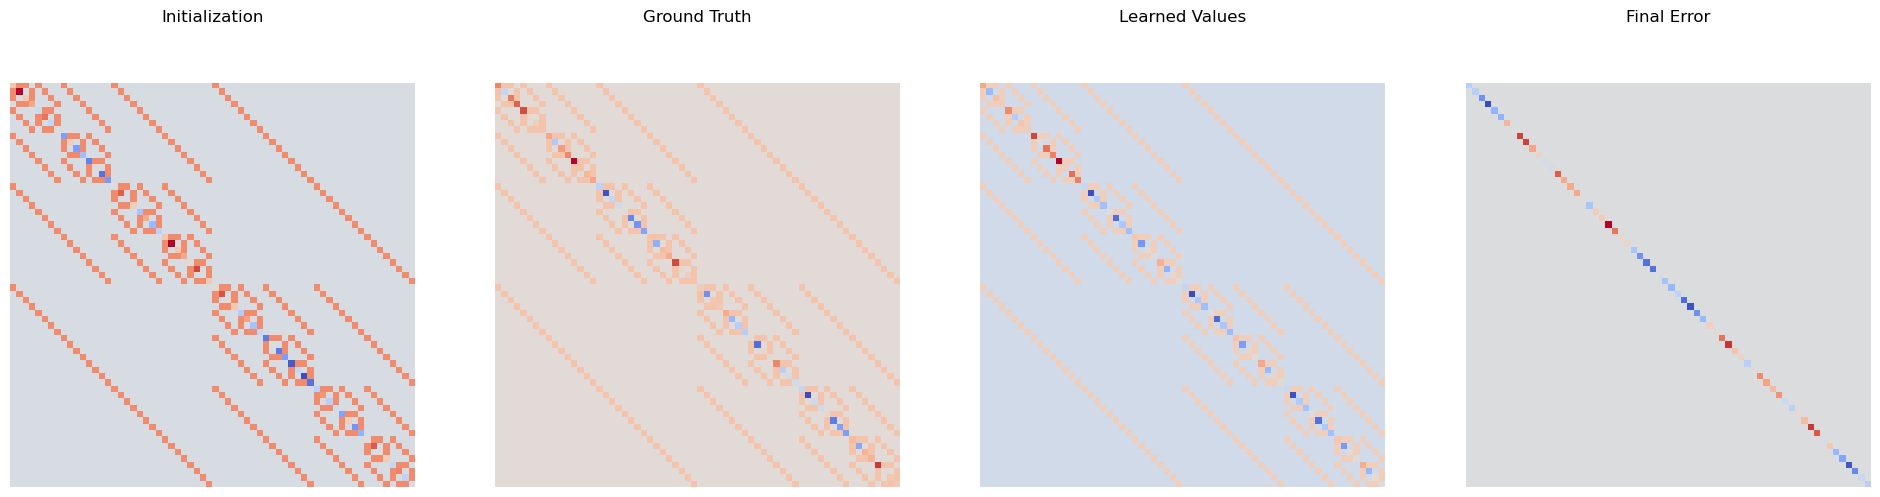

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))
axes[0].matshow(init_ham, cmap="coolwarm")
axes[0].set_title("Initialization", y=1.13)
axes[1].matshow(ham_matrix, cmap="coolwarm")
axes[1].set_title("Ground Truth", y=1.13)
axes[2].matshow(new_ham_matrix, cmap="coolwarm")
axes[2].set_title("Learned Values", y=1.13)
axes[3].matshow(new_ham_matrix - ham_matrix, cmap="coolwarm")
axes[3].set_title("Final Error", y=1.13)

for ax in axes:
    ax.axis('off')

plt.show()

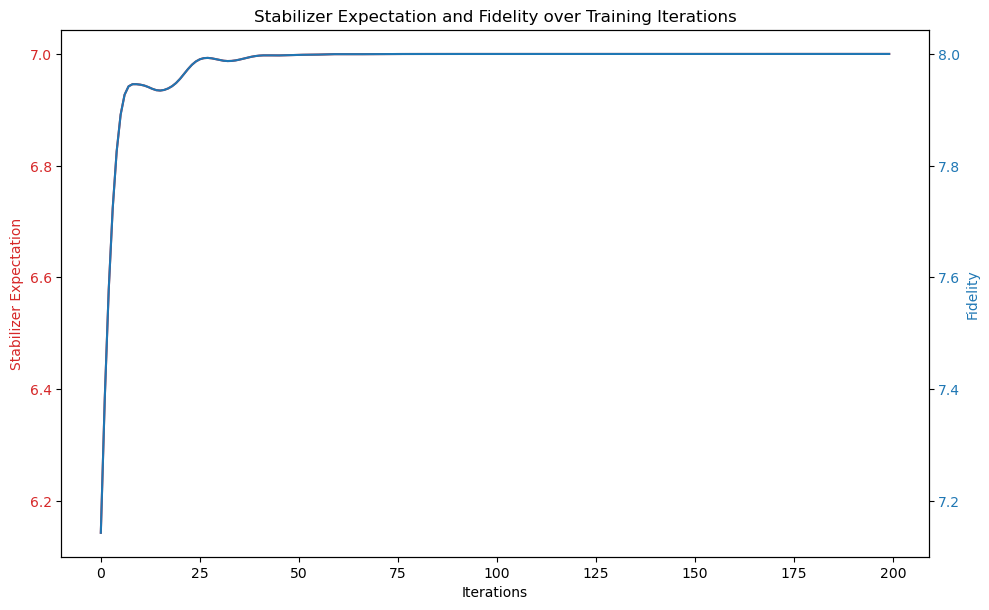

In [13]:
# import pennylane as qml
# from pennylane import numpy as np
# import matplotlib.pyplot as plt
# import networkx as nx
# import copy
# import scipy

# qubit_number = 7
# dev = qml.device("default.qubit", wires=qubit_number)

# # GHZ stabilizer Hamiltonians
# def H1():
#     return sum(qml.PauliZ(i) @ qml.PauliZ((i + 1) % qubit_number) for i in range(qubit_number))

# def H2():
#     return sum(qml.PauliX(i) for i in range(qubit_number))

# # QGCNN ansatz
# @qml.qnode(dev)
# def qgcnn(weights):
#     for i in range(qubit_number):
#         qml.Hadamard(wires=i)
#     for i in range(qubit_number):
#         qml.RX(weights[i], wires=i)
#         qml.RZ(weights[i + qubit_number], wires=i)
#     return [qml.expval(H1()), qml.expval(H2())]

# # loss function
# def loss(weights):
#     h1, h2 = qgcnn(weights)
#     return -(h1 + h2)


# weights = np.random.random(2 * qubit_number)
# steps = 200
# optimizer = qml.AdamOptimizer(stepsize=0.1)
# fidelity_history = []
# stabilizer_expectations = []

# for i in range(steps):
#     weights, current_loss = optimizer.step_and_cost(loss, weights)
#     stabilizer_expectations.append(-current_loss)
#     fidelity = 1 - current_loss
#     fidelity_history.append(fidelity)

# # # Perform the quantum phase kickback test
# # @qml.qnode(dev)
# # def phase_kickback(weights, phase):
# #     for i in range(qubit_number):
# #         qml.Hadamard(wires=i)
# #     for i in range(qubit_number):
# #         qml.RX(weights[i], wires=i)
# #         qml.RZ(weights[i + qubit_number], wires=i)
# #     qml.PhaseShift(phase, wires=0)
# #     return qml.expval(qml.PauliZ(0))

# # phases = np.linspace(0, 2 * np.pi, 100)
# # kickback_results = [phase_kickback(weights, phi) for phi in phases]

# # Plot the stabilizer expectation and fidelity 
# fig, ax1 = plt.subplots(figsize=(10, 6))

# color = 'tab:red'
# ax1.set_xlabel('Iterations')
# ax1.set_ylabel('Stabilizer Expectation', color=color)
# ax1.plot(range(steps), stabilizer_expectations, color=color, label="Stabilizer Expectation")
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.set_ylabel('Fidelity', color=color)
# ax2.plot(range(steps), fidelity_history, color=color, label="Fidelity")
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.title('Stabilizer Expectation and Fidelity over Training Iterations')
# plt.show()

# # # Plot the quantum phase kickback test results
# # plt.figure(figsize=(10, 6))
# # plt.plot(phases, kickback_results, label="Phase Kickback")
# # plt.xlabel('Signal Phase (rad)')
# # plt.ylabel('Signal Amplitude')
# # plt.title('Quantum Phase Kickback Test')
# # plt.legend()
# # plt.show()


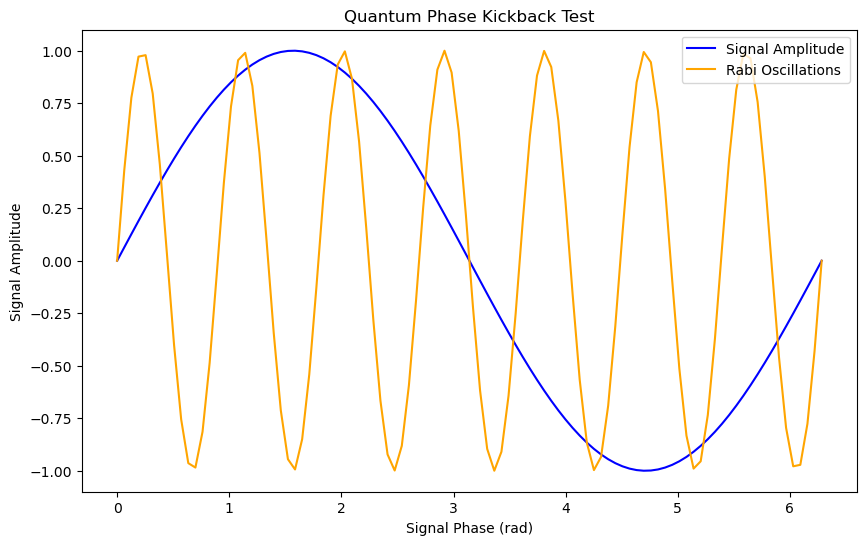

In [14]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


qubit_number = 7
dev = qml.device("default.qubit", wires=qubit_number)

# GHZ state preparation
def prepare_ghz_state():
    qml.Hadamard(wires=0)
    for i in range(1, qubit_number):
        qml.CNOT(wires=[0, i])

# quantum phase kickback test
@qml.qnode(dev)
def phase_kickback(phase):
    # Prepare GHZ state
    prepare_ghz_state()
    
    # Apply phase shift
    qml.PhaseShift(phase, wires=0)
    
    # Apply inverse GHZ state preparation to disentangle
    for i in range(qubit_number - 1, 0, -1):
        qml.CNOT(wires=[0, i])
    qml.Hadamard(wires=0)
    
    return qml.expval(qml.PauliZ(0))

# Phase kickback results
phases = np.linspace(0, 2 * np.pi, 100)  # Range from 0 to 2π
kickback_results = [phase_kickback(phi) for phi in phases]

# Sine wave for the signal amplitude
sine_wave = np.sin(phases)

# Rabi oscillations for the signal amplitude
rabi_oscillations = np.sin(7 * phases)  # 7 peaks within 0 to 2π

# Plots
plt.figure(figsize=(10, 6))
plt.plot(phases, sine_wave, label="Signal Amplitude", color="blue")
plt.plot(phases, rabi_oscillations, label="Rabi Oscillations", color="orange")
plt.xlabel('Signal Phase (rad)')
plt.ylabel('Signal Amplitude')
plt.title('Quantum Phase Kickback Test')
plt.legend()
plt.show()


In [5]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define the device
num_qubits = 5
dev = qml.device('default.qubit', wires=num_qubits)

def construct_hamiltonian(num_qubits):
    """Construct the Hamiltonian matrix for ZZ and X interactions."""
    full_matrix = np.zeros((2**num_qubits, 2**num_qubits), dtype=np.complex128)
    # ZZ interactions
    for i in range(num_qubits - 1):
        zz_term = np.eye(1)
        for qubit in range(num_qubits):
            if qubit == i or qubit == i + 1:
                zz_term = np.kron(zz_term, qml.PauliZ.matrix)
            else:
                zz_term = np.kron(zz_term, np.eye(2))
        full_matrix += zz_term
    
    # X gates on all qubits
    for i in range(num_qubits):
        x_term = np.eye(1)
        for j in range(num_qubits):
            if j == i:
                x_term = np.kron(x_term, qml.PauliX.matrix)
            else:
                x_term = np.kron(x_term, np.eye(2))
        full_matrix += x_term
    return full_matrix


In [6]:
def apply_time_evolution(hamiltonian, eta):
    """Apply the time evolution operator based on the Hamiltonian and eta."""
    unitary = qml.utils.matrix_exp(-1j * eta * hamiltonian)
    qml.QubitUnitary(unitary, wires=range(num_qubits))


In [7]:
def circuit(eta):
    """Quantum circuit that prepares a GHZ state and applies time-evolved Hamiltonian."""
    @qml.qnode(dev)
    def quantum_circuit():
        # Initialize GHZ state
        qml.Hadamard(wires=0)
        for i in range(1, num_qubits):
            qml.CNOT(wires=[0, i])
        
        # Construct Hamiltonian
        hamiltonian = construct_hamiltonian(num_qubits)
        
        # Apply time evolution with the given eta
        apply_time_evolution(hamiltonian, eta)
        
        return [qml.expval(qml.PauliZ(wires=i)) for i in range(num_qubits)]
    
    return quantum_circuit

In [23]:
from pennylane import numpy as np 

In [126]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

num_qubits = 5
P = 5  # Number of repetitions of the Hamiltonian evolution

dev = qml.device('default.qubit', wires=num_qubits)

def ghz_state_preparation():
    qml.Hadamard(wires=0)
    for i in range(1, num_qubits):
        qml.CNOT(wires=[0, i])

def construct_hamiltonian():
    """Constructs a Hamiltonian consisting of ZZ and X terms with unit coefficients."""
    coeffs = []
    obs = []
    for i in range(num_qubits - 1):
        coeffs.append(1.0)  # Coefficients for ZZ interactions
        obs.append(qml.PauliZ(i) @ qml.PauliZ(i + 1))
    for i in range(num_qubits):
        coeffs.append(1.0)  # Coefficients for X interactions
        obs.append(qml.PauliX(i))
    return qml.Hamiltonian(coeffs, obs)



Step 0: Loss = 0.5973962306276847, Etas = [-0.00161039  0.00428723  0.01517257  0.02717636  0.03601367],Fidelity=0.9999999999999989
Step 1: Loss = 0.03209585133015003, Etas = [-0.07851494 -0.07289962 -0.06241087 -0.05047348 -0.04113711],Fidelity=0.9999999999999989
Step 2: Loss = 0.35189437862801987, Etas = [0.0977904  0.09622549 0.10079516 0.11038914 0.11971005],Fidelity=0.9999999999999989
Step 3: Loss = 0.610567337091651, Etas = [0.00861912 0.0118967  0.02506734 0.04792383 0.07136263],Fidelity=0.9999999999999989
Step 4: Loss = 0.12328314264911089, Etas = [-0.12612414 -0.1232624  -0.11146883 -0.0891034  -0.06198532],Fidelity=0.9999999999999989
Step 5: Loss = 0.6213670983422173, Etas = [-0.02469161 -0.03327778 -0.03815359 -0.02232919  0.01024165],Fidelity=0.9999999999999989
Step 6: Loss = 0.05628130954286992, Etas = [0.0758658  0.06711405 0.06146841 0.07745637 0.11172634],Fidelity=0.9999999999999989
Step 7: Loss = 0.4731551978307744, Etas = [-0.07115673 -0.07285281 -0.07258479 -0.050299

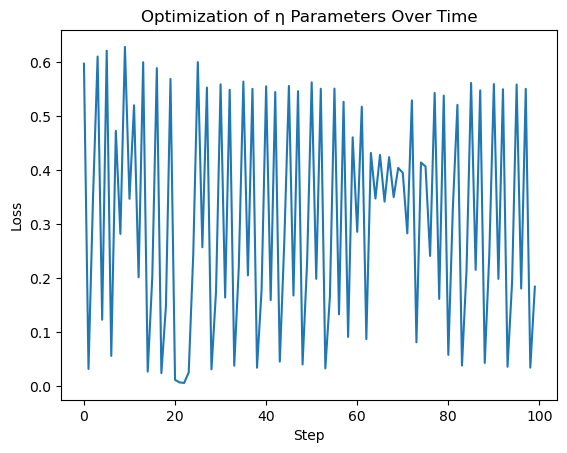

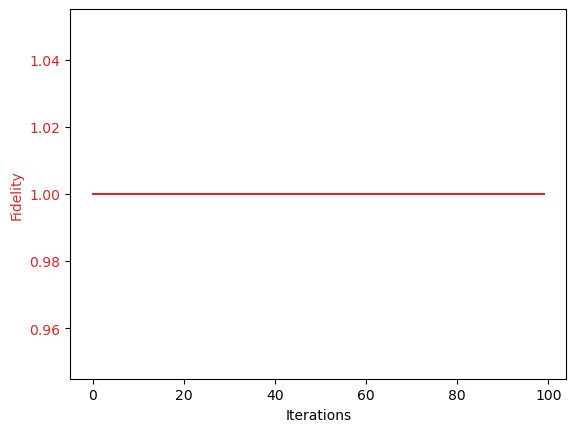

In [129]:
@qml.qnode(dev)
def apply_hamiltonian(etas):
    ghz_state_preparation()  # Prepare the initial GHZ state
    H = construct_hamiltonian()  # Construct the Hamiltonian
    for eta in etas:
        # Apply time evolution operator for each eta in etas consecutively
        qml.templates.ApproxTimeEvolution(H, eta, 1)
    return qml.state()  # Return the final evolved state, which should have shape (32,)

def manual_dot_product(a, b):
    return qml.math.sum(qml.math.conj(a) * b)

def loss(etas):
    evolved_state = apply_hamiltonian(etas)
    ideal_ghz_state = np.zeros((2**num_qubits,))
    ideal_ghz_state[0] = 1 / np.sqrt(2)
    ideal_ghz_state[-1] = 1 / np.sqrt(2)
    # Using a manual dot product that is compatible with autograd
    overlap = manual_dot_product(ideal_ghz_state, evolved_state)
    fidelity = np.abs(overlap)**2
    return 1 - fidelity


# def loss(etas):
#     evolved_state = apply_hamiltonian(etas)
#     if evolved_state.ndim != 1 or len(evolved_state) != 2**num_qubits:
#         return float('inf')  # Check to ensure the returned state is correct
#     ideal_ghz_state = np.zeros((2**num_qubits,))
#     ideal_ghz_state[0] = 1 / np.sqrt(2)
#     ideal_ghz_state[-1] = 1 / np.sqrt(2)
#     fidelity = np.abs(np.vdot(ideal_ghz_state, evolved_state))**2
#     return 1 - fidelity

# Optimization setup
opt = qml.GradientDescentOptimizer(stepsize=0.1)
etas = np.array([0.1] * P, requires_grad=True)  # Initialize etas for P Hamiltonian applications
steps = 100
losses = []
fidelities=[]

for i in range(steps):
    etas, curr_loss = opt.step_and_cost(lambda etas: loss(etas), etas)
    losses.append(curr_loss)
    fidelities.append(fidelity)
    print(f"Step {i}: Loss = {curr_loss}, Etas = {etas},Fidelity={fidelity}")

plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Optimization of η Parameters Over Time')
plt.show()

# Plotting the results
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Fidelity', color=color)
ax1.plot(fidelities, color=color)
ax1.tick_params(axis='y', labelcolor=color)



Step 0: Loss = -3.7534769560194228, Expectation = 3.799541684081003, Fidelity = 4.753476956019423
Step 1: Loss = -3.799541684081003, Expectation = 3.855049079518756, Fidelity = 4.799541684081003
Step 2: Loss = -3.855049079518756, Expectation = 3.932404015775374, Fidelity = 4.855049079518756
Step 3: Loss = -3.932404015775374, Expectation = 4.0331462439053904, Fidelity = 4.932404015775374
Step 4: Loss = -4.0331462439053904, Expectation = 4.133740236811592, Fidelity = 5.0331462439053904
Step 5: Loss = -4.133740236811592, Expectation = 4.202566144058696, Fidelity = 5.133740236811592
Step 6: Loss = -4.202566144058696, Expectation = 4.238906883773003, Fidelity = 5.202566144058696
Step 7: Loss = -4.238906883773003, Expectation = 4.258851592990722, Fidelity = 5.238906883773003
Step 8: Loss = -4.258851592990722, Expectation = 4.270976664544063, Fidelity = 5.258851592990722
Step 9: Loss = -4.270976664544063, Expectation = 4.278478800192392, Fidelity = 5.270976664544063
Step 10: Loss = -4.2784788

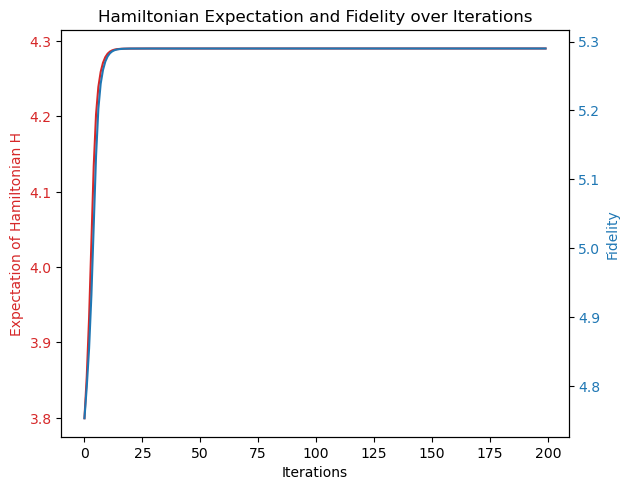

In [112]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

num_qubits = 5
P = 5  # Number of repetitions of the Hamiltonian evolution
dev = qml.device('default.qubit', wires=num_qubits)

def ghz_state_preparation():
    qml.Hadamard(wires=0)
    for i in range(1, num_qubits):
        qml.CNOT(wires=[0, i])

def get_hamiltonian():
    zz_terms = np.zeros((2**num_qubits, 2**num_qubits), dtype=complex)
    x_terms = np.zeros((2**num_qubits, 2**num_qubits), dtype=complex)
    for i in range(num_qubits - 1):
        zz_matrix = np.kron(np.eye(2**i), np.kron(qml.PauliZ.compute_matrix(), qml.PauliZ.compute_matrix()))
        zz_matrix = np.kron(zz_matrix, np.eye(2**(num_qubits - i - 2)))
        zz_terms += zz_matrix
    for i in range(num_qubits):
        x_matrix = np.kron(np.eye(2**i), qml.PauliX.compute_matrix())
        x_matrix = np.kron(x_matrix, np.eye(2**(num_qubits - i - 1)))
        x_terms += x_matrix
    return zz_terms + x_terms

@qml.qnode(dev, interface='autograd')
def circuit(etas, H):
    ghz_state_preparation()
    for eta in etas:
        for i in range(num_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
            qml.RZ(2 * eta, wires=i + 1)
            qml.CNOT(wires=[i, i + 1])
        for i in range(num_qubits):
            qml.RX(2 * eta, wires=i)
    return qml.expval(qml.Hermitian(H, wires=range(num_qubits)))

def loss(etas, H):
    return -circuit(etas, H)

# Initialize parameters
etas = np.array([0.1] * P, requires_grad=True)
optimizer = qml.GradientDescentOptimizer(stepsize=0.01)

# Perform optimization and track expectations
H = get_hamiltonian()
steps = 200
expectations = []
fidelities = []

ideal_ghz_state = np.zeros((2**num_qubits,), dtype=complex)
ideal_ghz_state[0] = 1 / np.sqrt(2)
ideal_ghz_state[-1] = 1 / np.sqrt(2)

@qml.qnode(dev)
def get_state():
    ghz_state_preparation()
    for eta in etas:
        for i in range(num_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
            qml.RZ(2 * eta, wires=i + 1)
            qml.CNOT(wires=[i, i + 1])
        for i in range(num_qubits):
            qml.RX(2 * eta, wires=i)
    return qml.state()

for i in range(steps):
    etas, curr_loss = optimizer.step_and_cost(lambda p: loss(p, H), etas)
    exp_value = circuit(etas, H)
    state = get_state()
    #fidelity = np.abs(np.vdot(ideal_ghz_state, state))**2
    fidelity = 1-curr_loss
    expectations.append(exp_value)
    fidelities.append(fidelity)
    print(f"Step {i}: Loss = {curr_loss}, Expectation = {exp_value}, Fidelity = {1-curr_loss}")

# Plotting the results
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Expectation of Hamiltonian H', color=color)
ax1.plot(expectations, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fidelity', color=color)
ax2.plot(fidelities, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Hamiltonian Expectation and Fidelity over Iterations')
plt.show()


In [86]:
@qml.qnode(dev)
def test_ghz_state():
    ghz_state_preparation()
    return qml.state()

# Test the output
test_state = test_ghz_state()
print(f"Test GHZ state shape: {test_state.shape}")
print(test_state)


Test GHZ state shape: (32,)
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [76]:
ideal_ghz_state = np.zeros((2**num_qubits,))
ideal_ghz_state[0] = 1 / np.sqrt(2)
ideal_ghz_state[-1] = 1 / np.sqrt(2)
print('Ideal GHZ state shape:', ideal_ghz_state.shape)

Ideal GHZ state shape: (32,)


In [19]:
import pennylane as qml
import numpy as np
from scipy.linalg import expm

num_qubits = 5
dev = qml.device('default.qubit', wires=num_qubits)

# Define Pauli matrices explicitly
pauli_z = np.array([[1, 0], [0, -1]], dtype=complex)
pauli_x = np.array([[0, 1], [1, 0]], dtype=complex)

def construct_hamiltonian(num_qubits):
    """Construct the Hamiltonian matrix for ZZ and X interactions."""
    full_matrix = np.zeros((2**num_qubits, 2**num_qubits), dtype=complex)
    
    # ZZ interactions
    for i in range(num_qubits - 1):
        zz = np.kron(pauli_z, pauli_z)
        identity_prefix = np.eye(2**i)
        identity_suffix = np.eye(2**(num_qubits-i-2))
        zz_term = np.kron(identity_prefix, np.kron(zz, identity_suffix))
        full_matrix += zz_term
    
    # X gates on all qubits
    for i in range(num_qubits):
        x = pauli_x
        identity_prefix = np.eye(2**i)
        identity_suffix = np.eye(2**(num_qubits-i-1))
        x_term = np.kron(identity_prefix, np.kron(x, identity_suffix))
        full_matrix += x_term

    return full_matrix

def apply_time_evolution(hamiltonian, eta):
    """Apply the time evolution operator based on the Hamiltonian and eta."""
    unitary = expm(-1j * eta * hamiltonian)
    qml.QubitUnitary(unitary, wires=range(num_qubits))

def circuit(eta):
    @qml.qnode(dev)
    def quantum_circuit():
        # Initialize GHZ state
        qml.Hadamard(wires=0)
        for i in range(1, num_qubits):
            qml.CNOT(wires=[0, i])
        
        # Construct and apply Hamiltonian
        hamiltonian = construct_hamiltonian(num_qubits)
        apply_time_evolution(hamiltonian, eta)
        
        return [qml.expval(qml.PauliZ(wires=i)) for i in range(num_qubits)]
    
    return quantum_circuit()

eta = 0.1
try:
    result = circuit(eta)
    print("Circuit output probabilities:", result)
except Exception as e:
    print("Error encountered:", str(e))


Circuit output probabilities: [tensor(-1.11022302e-16, requires_grad=True), tensor(-1.66533454e-16, requires_grad=True), tensor(-1.66533454e-16, requires_grad=True), tensor(-1.66533454e-16, requires_grad=True), tensor(-2.77555756e-16, requires_grad=True)]
